# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: Escaran, Jed Jerrel\
_Student No._: 2021-07451\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 26 October 2023 1:47AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** JED JERREL K. ESCARAN

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - 30/30
* Problem 2 - 30/30
* Problem 3 - 40/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

In [108]:
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

def trap(n):                  # n is number of slices/steps
  a = 0.0                     # lower bound
  b = 5.0                     # upper bound
  h = (b-a)/n                 # distance between points or width (base)

  #   since the trapezoids in the middle share a side/height with their adjacent trapezoids,
  #   the "averaging" (for the two heights) or 0.5 in the trapezoid formula gets cancelled
  #   out since the heights in between a and b are in multiples of 2 except for the first
  #   height f(a) and last height f(b) which is why s initial value is:

  s = 0.5*f(a) + 0.5*f(b)     # initial s value ; weights are 1/2
  for i in range(1,n):        # looping over each step
    s += f(a+i*h)             # summing the other heights
  return (h*s)                # multiplying s to h (base) to get the area

Ns = [10,100,1000]            # diff n's
for i in Ns:
  print("for n = " + str(i) + ": " + str(trap(i)) + " with percentage error of " + str(abs((trap(i)-1450)/1450)*100) ) #print results and %error

for n = 10: 1471.4375 with percentage error of 1.478448275862069
for n = 100: 1450.2145812500003 with percentage error of 0.014798706896569988
for n = 1000: 1450.0021458331234 with percentage error of 0.00014798849127240326


In [109]:
def simp(n, a, b):
  h = (b-a)/n              #distance between slices

  s = f(a)+f(b)            # initial s
  for i in range(1,n,2):   # odd values of i
    s += 4*f(a+i*h)        # 4/3 weight
  for i in range(2,n,2):   # even values of i
    s += 2*f(a+i*h)        # 2/3 weight
  s = s*(1./3)*h           # weights are 1/3 for first and last slice
  return s

for i in Ns:
  print("for n = " + str(i) + ": " + str(simp(i,a,b)) + " with percentage error of " + str(abs((simp(i,a,b)-1450)/1450)*100) )
  # comparing the percent errors from both methods, simpson's rule percentage error is almost negligible,
  # whereas the percent errors in the trapezoidal method is still significant

for n = 10: 1450.0833333333333 with percentage error of 0.005747126436776382
for n = 100: 1450.0000083333337 with percentage error of 5.747126657485657e-07
for n = 1000: 1450.0000000008342 with percentage error of 5.753338035870472e-11


### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [110]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):                     # This function returns the sample points and weights for Gaussian quadrature (given the number of sample points N)
  a = linspace(3,4*N-1,N)/(4*N+2)
  x = cos(pi*a+1/(8*N*N*tan(a)))
  epsilon = 1e-15
  delta = 1.0
  while delta>epsilon:
    p0 = ones(N,float)
    p1 = copy(x)
    for k in range(1,N):
      p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
    dp = (N+1)*(p0-x*p1)/(1-x*x)
    dx = p1/dp
    x -= dx
    delta= max(abs(dx))

  w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
  return x,w

In [111]:
def gauss(N,a,b):
  x,w = gaussxw(N)            #  sample points and weights
  xp = 0.5*(b-a)*x+0.5*(b+a)  #  rescaling to given domain
  wp = 0.5*(b-a)*w            #  rescaling to given domain

  s = 0.0                     #  initial s
  for i in range(N):          #  looping over all N
    s+=wp[i]*f(xp[i])         #  summing to get estimate for integral

  return s

print(gauss(3,0,5))           #  3 for number of slices; x = 0 and 5 as bounds

1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

In [112]:
import matplotlib.pyplot as plt
from math import sqrt

m = 1                                             #  mass
N = 20                                            #  points
a = 0                                             #  lower bound

amplitude = float(input("amplitude: "))           #  input amplitude

def T(x,amp):                                     #  period T equation
  return sqrt(8*m)/sqrt(amp**4-x**4)

def gauss(N,b):
  x,w = gaussxw(N)                                #  sample points and weights
  xp = 0.5*(b-a)*x + 0.5*(b+a)                    #  rescaling to given domain
  wp = 0.5*(b-a)*w                                #  rescaling to given domain

  s = 0.0                                         #  initial
  for i in range(N):                              #  looping over all N
    s += wp[i] * T(xp[i],b)                       #  summing to get estimate for integral

  return s

print("period: " + str(gauss(N, amplitude)))      #  print period

amplitude: 1
period: 3.648094084043215


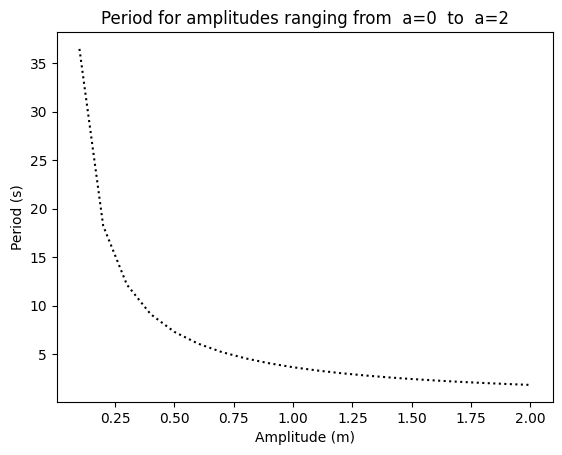

In [113]:
s = list()                              #  initiating list for plot
amps = linspace(0.1,2,N)                #  a from 0 to 2

for amp in amps:
  s.append(gauss(N, amp))               #  appending resulting periods into list for easy plotting

                                        #  plot stuff

plt.title("Period for amplitudes ranging from  a=0  to  a=2")
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.plot(amps,s,'k:')
plt.show()

 as amplitude increases, period decreases; which indicates the oscillator getting faster even though the particle has to traverse the increasing amplitude. This is due to the restoring force which gets stronger the larger amplitude gets.